In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Plot styling
plt.style.use('seaborn-poster')  # Better sizing
plt.style.use('seaborn-white')   # White background

def pretty_preview(df, nrow_per_frame = 5, ncol_per_frame = 4):
    '''
    Preview all columns of a dataframe by displaying samples in small chunks for readability.
    Each chunk will be of size (nrow_per_frame, ncol_per_frame)
    '''
    nrow,ncol = df.shape
    start_ndx = 0
    end_ndx = np.min([ncol_per_frame,ncol])
    while end_ndx < ncol:
        ## Print small extract
        display(df.iloc[0:nrow_per_frame, start_ndx:end_ndx])
        
        ## Update
        start_ndx = end_ndx
        end_ndx += ncol_per_frame
        
        ## Check if we're at the end
        if end_ndx >= ncol: 
            end_ndx = ncol
            display(df.iloc[0:nrow_per_frame, start_ndx:end_ndx])
    return None

In [13]:
## MAF Specifications are here:
## https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/
## https://wiki.nci.nih.gov/display/TCGA/Mutation+Annotation+Format+(MAF)+Specification
## https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/

in_path_varscan = 'data/maf/6c93f518-1956-4435-9806-37185266d248/TCGA.BRCA.varscan.6c93f518-1956-4435-9806-37185266d248.DR-10.0.somatic.maf.gz'
in_path_muse = 'data/maf/b8ca5856-9819-459c-87c5-94e91aca4032/TCGA.BRCA.muse.b8ca5856-9819-459c-87c5-94e91aca4032.DR-10.0.somatic.maf.gz'
in_path_ss = 'data/maf/7dd592e3-5950-4438-96d5-3c718aca3f13/TCGA.BRCA.somaticsniper.7dd592e3-5950-4438-96d5-3c718aca3f13.DR-10.0.somatic.maf.gz'
in_path_mutect = 'data/maf/995c0111-d90b-4140-bee7-3845436c3b42/TCGA.BRCA.mutect.995c0111-d90b-4140-bee7-3845436c3b42.DR-10.0.somatic.maf.gz'

In [14]:
## Concatenate df for each caller. We will remove duplicates below.

paths = [in_path_varscan, in_path_muse, in_path_ss, in_path_mutect]
frames = [pd.read_table(path, low_memory=False, compression='gzip', comment='#')
         for path in paths]
df = pd.concat(frames)
del frames

n_samples = df['case_id'].nunique()
print('Shape of combined frame: {}'.format(df.shape))
print('Number of sampled individuals: {}'.format(n_samples))
pretty_preview(df)

Shape of combined frame: (370461, 120)
Number of sampled individuals: 986


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build
0,CALML6,163688,WUGSC,GRCh38
1,PRKCZ,5590,WUGSC,GRCh38
2,CCDC27,148870,WUGSC,GRCh38
3,KCNAB2,8514,WUGSC,GRCh38
4,PNRC2,55629,WUGSC,GRCh38


,Chromosome,Start_Position,End_Position,Strand
0,chr1,1916819,1916819,+
1,chr1,2172304,2172304,+
2,chr1,3766586,3766586,+
3,chr1,6040634,6040634,+
4,chr1,23961791,23961791,+


,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1
0,Missense_Mutation,SNP,C,C
1,Missense_Mutation,SNP,G,G
2,Missense_Mutation,SNP,G,G
3,Silent,SNP,G,G
4,Missense_Mutation,SNP,A,A


,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode
0,G,NaN,NaN,TCGA-A2-A3Y0-01A-11D-A23C-09
1,C,NaN,NaN,TCGA-A2-A3Y0-01A-11D-A23C-09
2,A,NaN,NaN,TCGA-A2-A3Y0-01A-11D-A23C-09
3,C,NaN,NaN,TCGA-A2-A3Y0-01A-11D-A23C-09
4,G,novel,NaN,TCGA-A2-A3Y0-01A-11D-A23C-09


,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1
0,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN
1,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN
2,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN
3,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN
4,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN


,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source
0,NaN,Somatic,NaN,NaN
1,NaN,Somatic,NaN,NaN
2,NaN,Somatic,NaN,NaN
3,NaN,Somatic,NaN,NaN
4,NaN,Somatic,NaN,NaN


,Validation_Method,Score,BAM_File,Sequencer
0,NaN,NaN,NaN,Illumina HiSeq 2000
1,NaN,NaN,NaN,Illumina HiSeq 2000
2,NaN,NaN,NaN,Illumina HiSeq 2000
3,NaN,NaN,NaN,Illumina HiSeq 2000
4,NaN,NaN,NaN,Illumina HiSeq 2000


,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp
0,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.321C>G,p.Asn107Lys
1,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.1201G>C,p.Gly401Arg
2,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.1504G>A,p.Glu502Lys
3,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.66G>C,p.=
4,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.334A>G,p.Ser112Gly


,HGVSp_Short,Transcript_ID,Exon_Number,t_depth
0,p.N107K,ENST00000307786,4/6,59
1,p.G401R,ENST00000378567,13/18,47
2,p.E502K,ENST00000294600,9/12,47
3,p.G22G,ENST00000164247,2/16,20
4,p.S112G,ENST00000334351,3/3,70


,t_ref_count,t_alt_count,n_depth,n_ref_count
0,52,7,36,NaN
1,20,27,42,NaN
2,19,28,39,NaN
3,7,13,16,NaN
4,58,12,31,NaN


,n_alt_count,all_effects,Allele,Gene
0,NaN,"CALML6,missense_variant,p.N107K,ENST0000030778...",G,ENSG00000169885
1,NaN,"PRKCZ,missense_variant,p.G401R,ENST00000378567...",C,ENSG00000067606
2,NaN,"CCDC27,missense_variant,p.E502K,ENST0000029460...",A,ENSG00000162592
3,NaN,"KCNAB2,synonymous_variant,p.G22G,ENST000001642...",C,ENSG00000069424
4,NaN,"PNRC2,missense_variant,p.S112G,ENST00000334351...",G,ENSG00000189266


,Feature,Feature_type,One_Consequence,Consequence
0,ENST00000307786,Transcript,missense_variant,missense_variant
1,ENST00000378567,Transcript,missense_variant,missense_variant
2,ENST00000294600,Transcript,missense_variant,missense_variant
3,ENST00000164247,Transcript,synonymous_variant,synonymous_variant
4,ENST00000334351,Transcript,missense_variant,missense_variant


,cDNA_position,CDS_position,Protein_position,Amino_acids
0,775/1101,321/546,107/181,N/K
1,1362/2326,1201/1779,401/592,G/R
2,1588/2176,1504/1971,502/656,E/K
3,630/4273,66/1104,22/367,G
4,745/2416,334/420,112/139,S/G


,Codons,Existing_variation,ALLELE_NUM,DISTANCE
0,aaC/aaG,NaN,1,NaN
1,Ggc/Cgc,NaN,1,NaN
2,Gaa/Aaa,NaN,1,NaN
3,ggG/ggC,NaN,1,NaN
4,Agc/Ggc,NaN,1,NaN


,TRANSCRIPT_STRAND,SYMBOL,SYMBOL_SOURCE,HGNC_ID
0,1.0,CALML6,HGNC,HGNC:24193
1,1.0,PRKCZ,HGNC,HGNC:9412
2,1.0,CCDC27,HGNC,HGNC:26546
3,1.0,KCNAB2,HGNC,HGNC:6229
4,1.0,PNRC2,HGNC,HGNC:23158


,BIOTYPE,CANONICAL,CCDS,ENSP
0,protein_coding,YES,CCDS30566.1,ENSP00000304643
1,protein_coding,YES,CCDS37.1,ENSP00000367830
2,protein_coding,YES,CCDS50.1,ENSP00000294600
3,protein_coding,NaN,CCDS55.1,ENSP00000164247
4,protein_coding,YES,CCDS246.1,ENSP00000334840


,SWISSPROT,TREMBL,UNIPARC,RefSeq
0,Q8TD86,NaN,UPI000034EC9B,NM_138705.2
1,Q05513,NaN,UPI0000169EB7,NM_002744.4
2,Q2M243,NaN,UPI000013E186,NM_152492.2
3,Q13303,A0A024R4E3,NaN,NM_001199860.1
4,Q9NPJ4,A0A024RAC2,NaN,NM_017761.3


,SIFT,PolyPhen,EXON,INTRON
0,deleterious(0.01),probably_damaging(0.957),4/6,NaN
1,deleterious(0),probably_damaging(0.999),13/18,NaN
2,deleterious(0),probably_damaging(0.957),9/12,NaN
3,NaN,NaN,2/16,NaN
4,deleterious(0.02),benign(0.074),3/3,NaN


,DOMAINS,GMAF,AFR_MAF,AMR_MAF
0,PROSITE_profiles:PS50222;Superfamily_domains:S...,NaN,NaN,NaN
1,Pfam_domain:PF00069;Pfam_domain:PF07714;PROSIT...,NaN,NaN,NaN
2,Coiled-coils_(Ncoils):ncoils,NaN,NaN,NaN
3,Prints_domain:PR01579,NaN,NaN,NaN
4,Low_complexity_(Seg):Seg,NaN,NaN,NaN


,ASN_MAF,EAS_MAF,EUR_MAF,SAS_MAF
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


,AA_MAF,EA_MAF,CLIN_SIG,SOMATIC
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


,MOTIF_SCORE_CHANGE,IMPACT,PICK,VARIANT_CLASS
0,NaN,MODERATE,1.0,SNV
1,NaN,MODERATE,1.0,SNV
2,NaN,MODERATE,1.0,SNV
3,NaN,LOW,NaN,SNV
4,NaN,MODERATE,1.0,SNV


,TSL,HGVS_OFFSET,PHENO,MINIMISED
0,1.0,NaN,NaN,1
1,1.0,NaN,NaN,1
2,1.0,NaN,NaN,1
3,2.0,NaN,NaN,1
4,1.0,NaN,NaN,1


,ExAC_AF,ExAC_AF_Adj,ExAC_AF_AFR,ExAC_AF_AMR
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


,ExAC_AF_EAS,ExAC_AF_FIN,ExAC_AF_NFE,ExAC_AF_OTH
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


,ExAC_AF_SAS,GENE_PHENO,FILTER,CONTEXT
0,NaN,NaN,PASS,CAGAACCAGGA
1,NaN,NaN,PASS,AGGAAGGCCTG
2,NaN,NaN,PASS,TCATTGAAAAG
3,NaN,NaN,PASS,CCCGGGATGAT
4,NaN,NaN,PASS,CACCAAGCCAC


,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id
0,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1,174850b4-5ec2-462b-a890-89bd1716b3c2
1,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1,174850b4-5ec2-462b-a890-89bd1716b3c2
2,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1,174850b4-5ec2-462b-a890-89bd1716b3c2
3,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1,174850b4-5ec2-462b-a890-89bd1716b3c2
4,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1,174850b4-5ec2-462b-a890-89bd1716b3c2


,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,NaN,COSM3803163,True,Unknown
1,NaN,COSM3803781;COSM3803782,True,Unknown
2,NaN,COSM3805079,True,Unknown
3,NaN,COSM3805665;COSM5832645,True,Unknown
4,NaN,NaN,False,Unknown


In [15]:
## Rename and reorder columns

col_name_map = OrderedDict([
    ('Chromosome', 'CHR'),
    ('Start_Position', 'START'),
    ('End_Position', 'END'),
    ('SYMBOL', 'GENE'),
    ('Reference_Allele', 'REF'),
    ('Allele', 'ALT'),
    ('Variant_Classification', 'CLASS'),
    ('IMPACT', 'IMPACT'),
    ('Variant_Type', 'TYPE'),
    ('Tumor_Sample_Barcode', 'BARCODE'),
])
keep_cols = list(col_name_map.values()) # Need list() because its odict
df.rename(columns=col_name_map, inplace=True)
df = df[keep_cols]

In [16]:
## Create new columns from old
df['SAMPLE'] = df.BARCODE.str[0:12]
df['MUT_ID'] = df.CHR.str.cat([
    df.GENE, 
    df.START.map(str), 
    df.END.map(str), 
    df.REF, 
    df.ALT], 
    sep = ':'
)

In [17]:
## Remove duplicates
df.drop_duplicates(inplace = True)
pretty_preview(df)

,CHR,START,END,GENE
0,chr1,1916819,1916819,CALML6
1,chr1,2172304,2172304,PRKCZ
2,chr1,3766586,3766586,CCDC27
3,chr1,6040634,6040634,KCNAB2
4,chr1,23961791,23961791,PNRC2


,REF,ALT,CLASS,IMPACT
0,C,G,Missense_Mutation,MODERATE
1,G,C,Missense_Mutation,MODERATE
2,G,A,Missense_Mutation,MODERATE
3,G,C,Silent,LOW
4,A,G,Missense_Mutation,MODERATE


,TYPE,BARCODE,SAMPLE,MUT_ID
0,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:CALML6:1916819:1916819:C:G
1,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:PRKCZ:2172304:2172304:G:C
2,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:CCDC27:3766586:3766586:G:A
3,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:KCNAB2:6040634:6040634:G:C
4,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:PNRC2:23961791:23961791:A:G


Stats to explore:

* Breakdown by individual
     * I did breakdown by most number of total mutations, but maybe I should also try unique per gene or unique per (more intelligent grouping - functional?)
* Genes with most number of unique mutations
* Genes with most number of total mutations
* Genes with most number of unique individuals mutatated
* Genes with most number of total individuals mutated
* All of the above but stratified by e.g. variant type or impact


In [20]:
## Simple summaries

print('Shape of total frame: {}'.format(df.shape))

## Total number of mutations found
n_genes = df.GENE.nunique()
n_samples = df.BARCODE.nunique()
n_mutations = df.MUT_ID.nunique()
n_mutation_classes = df.CLASS.nunique()

print('Number of unique')
print('\tSamples: {}\n\tGenes: {}\n\tMutations: {} \n\tMutation Classes: {}\n'.format(
    n_samples, n_genes, n_mutations, n_mutation_classes
))

print('Counts per CLASS:')
display(df.CLASS.value_counts())

print('Counts per IMPACT:')
display(df.IMPACT.value_counts())

print('Counts per TYPE:')
display(df.TYPE.value_counts())

print('Top repeated (>10) mutations:')
mut_counts = df.MUT_ID.value_counts()
display(mut_counts[mut_counts.gt(10)])

Shape of total frame: (132916, 12)
Number of unique
	Samples: 986
	Genes: 19167
	Mutations: 130611 
	Mutation Classes: 18

Counts per CLASS:


Missense_Mutation         66371
Silent                    23881
3'UTR                     11052
Intron                     6990
Nonsense_Mutation          6056
Frame_Shift_Del            3661
5'UTR                      3392
RNA                        2543
Frame_Shift_Ins            1975
Splice_Site                1921
Splice_Region              1537
3'Flank                    1132
5'Flank                     906
In_Frame_Del                869
In_Frame_Ins                433
Nonstop_Mutation             93
Translation_Start_Site       90
IGR                          14
Name: CLASS, dtype: int64

Counts per IMPACT:


MODERATE    67648
MODIFIER    26059
LOW         25413
HIGH        13796
Name: IMPACT, dtype: int64

Counts per TYPE:


SNP    121319
DEL      7316
INS      4281
Name: TYPE, dtype: int64

Top repeated (>10) mutations:


chr3:PIK3CA:179234297:179234297:A:G         121
chr3:PIK3CA:179218303:179218303:G:A          63
chr3:PIK3CA:179218294:179218294:G:A          43
chr1:ST6GALNAC3:76576946:76576947:-:AAAC     33
chr14:AKT1:104780214:104780214:C:T           25
chr10:GATA3:8069470:8069471:CA:-             21
chr3:MUC4:195783009:195783009:C:T            21
chr17:TP53:7675088:7675088:C:T               20
chr3:MUC4:195783008:195783008:A:G            20
chr3:PIK3CA:179203765:179203765:T:A          17
chr15:GOLGA6L6:20535018:20535018:C:T         17
chr6:OPRM1:154107953:154107958:TTTTTA:-      13
chr3:PIK3CA:179234297:179234297:A:T          13
chr17:TP53:7673802:7673802:C:T               12
chr1:NBPF12:146963189:146963189:G:C          11
chr16:PKD1P6:15104542:15104542:T:A           11
Name: MUT_ID, dtype: int64

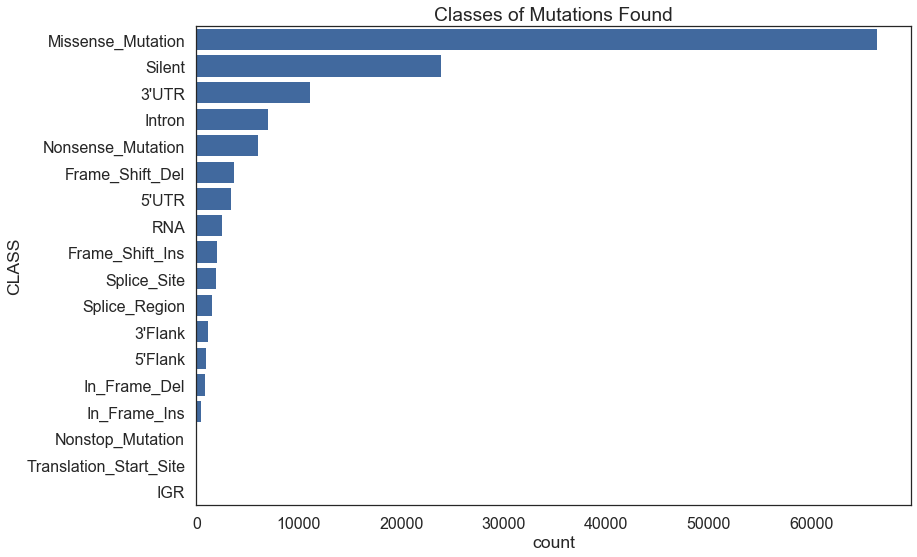

In [30]:
## Bar plots


sns.countplot(y='CLASS', 
              data=df, 
              color='#3267AD',
              order = df.CLASS.value_counts().index
)
plt.title('Classes of Mutations Found')
plt.show()

Most mutations:
SAMPLE
TCGA-AN-A046    7948
TCGA-AC-A23H    6711
TCGA-5L-AAT1    2117
TCGA-BH-A18G    2033
TCGA-AN-A0AK    2029
TCGA-A8-A09Z    1924
TCGA-BH-A0HF    1695
TCGA-AO-A128    1644
TCGA-D8-A1XK    1541
TCGA-BH-A0B6    1419
TCGA-D8-A1XQ    1274
TCGA-D8-A1JA    1245
TCGA-D8-A27G    1191
TCGA-D8-A1J8    1127
TCGA-AR-A0U0    1125
dtype: int64

Least least mutations:
SAMPLE
TCGA-AC-A2FF    19
TCGA-A2-A0ES    18
TCGA-AC-A2FB    17
TCGA-AR-A252    16
TCGA-AR-A24W    16
TCGA-LL-A440    16
TCGA-AO-A1KO    15
TCGA-A2-A1G6    12
TCGA-A8-A08C     9
TCGA-A2-A25F     7
dtype: int64


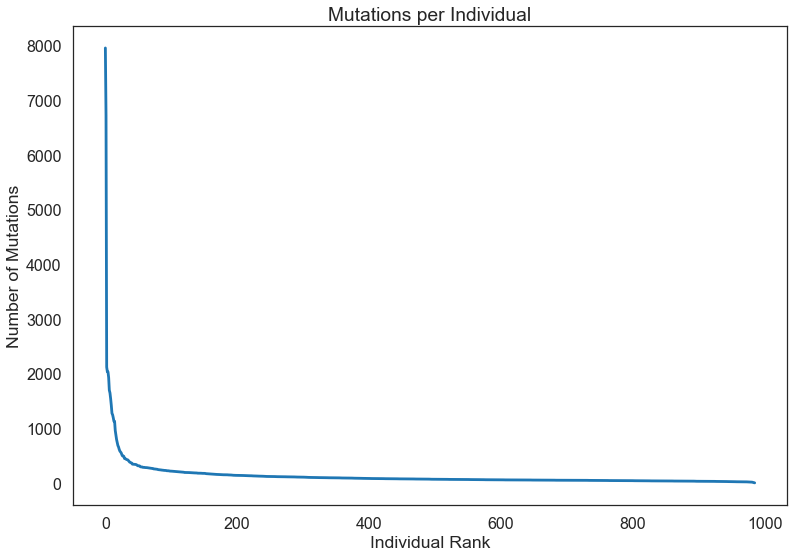

In [32]:
## Ranking summary/plots


df1 = df.groupby('SAMPLE').size().sort_values(ascending=False)
print('Most mutations:')
print(df1.iloc[0:15])
print('\nLeast least mutations:')
print(df1.iloc[-11:-1])

plt.plot(df1.values)
plt.title('Mutations per Individual')
plt.xlabel('Individual Rank')
plt.ylabel('Number of Mutations')
plt.show()

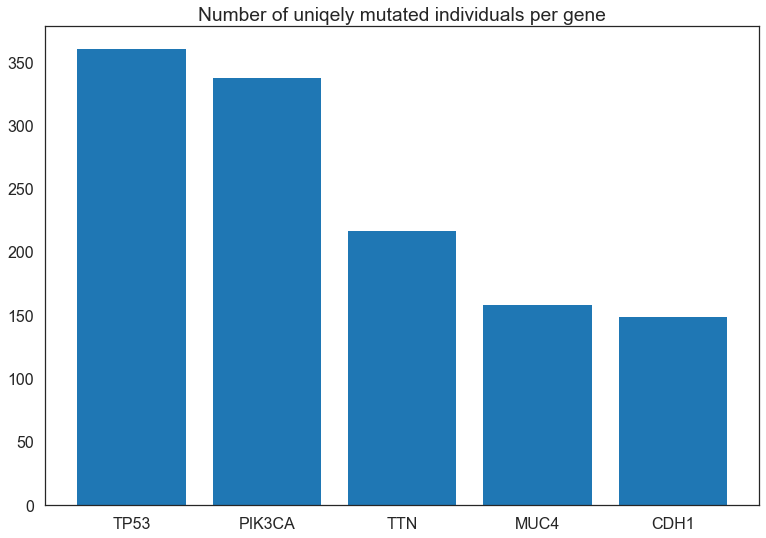

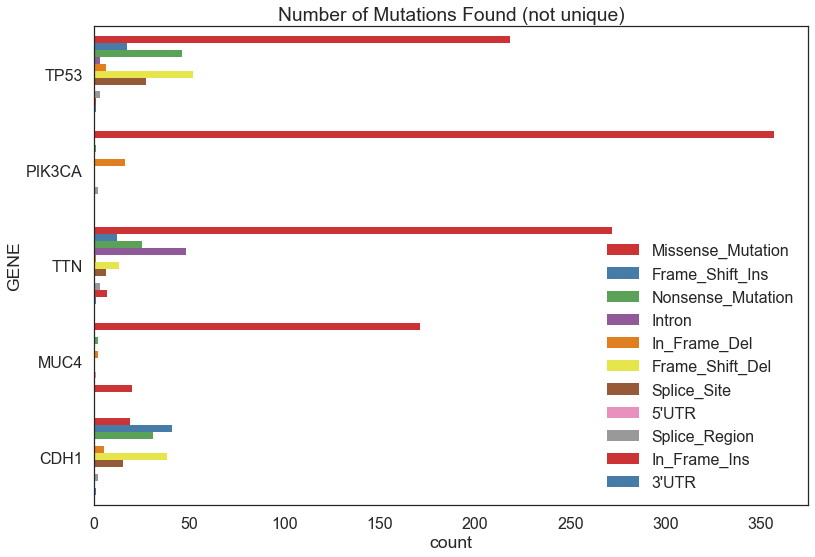

In [50]:
## Most mutated genes

## Plot params
n_genes_to_plot = 5
ignore_classes = ['Silent']

df1 = df[~df.CLASS.isin(ignore_classes)]

## Calculate most mutated unique samples per gene
samples_mutated_per_gene = df1.groupby('GENE').BARCODE.nunique()
samples_mutated_per_gene.sort_values(ascending=False,inplace=True)
top_genes = samples_mutated_per_gene.index.tolist()[0:n_genes_to_plot]
top_counts = samples_mutated_per_gene.values.tolist()[0:n_genes_to_plot]


## Plot
plt.bar(np.arange(n_genes_to_plot), top_counts)
plt.xticks(np.arange(n_genes_to_plot),top_genes)
plt.title('Number of uniqely mutated individuals per gene')
plt.show()

## 

sns.countplot(y='GENE',
              hue = 'CLASS',
              order = top_genes,
              orient = 'h',
              palette='Set1',
              data=df1[df1.GENE.isin(top_genes)])
plt.title('Number of Mutations Found (not unique)')
plt.legend(loc=0)
plt.show()

In [20]:
print(plt.style.available)

['seaborn-darkgrid', 'seaborn-paper', '_classic_test', 'seaborn-dark', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-whitegrid', 'classic', 'seaborn-poster', 'ggplot', 'Solarize_Light2', 'seaborn-bright', 'seaborn', 'seaborn-notebook', 'dark_background', 'fivethirtyeight', 'grayscale', 'seaborn-white', 'bmh', 'seaborn-colorblind', 'seaborn-muted', 'seaborn-talk', 'seaborn-ticks', 'fast', 'seaborn-deep']


In [21]:
print(df[df.GENE.isin(top_genes) & df.MUTATION_TYPE.isin(['WT'])])
print(df[df.MUTATION_TYPE.isin(['WT'])])
print(df[df.GENE.isin(top_genes)])
# dat=df[df.MUTATION_TYPE != 'WT' & df.GENE in top_genes]

AttributeError: 'DataFrame' object has no attribute 'MUTATION_TYPE'

In [ ]:
# Could use this code if we want to make a column that says which caller the frame was made
# from.

# callers = ['varscan', 'muse', 'ss', 'mutect']
# paths = [in_path_varscan, in_path_muse, in_path_ss, in_path_mutect]
# frames = [pd.read_table(path, low_memory=False, compression='gzip', comment='#')
#          for path in paths]

# for i in range(len(frames)):
#     frames[i]['CALLER'] = callers[i]
# df = pd.concat(frames)
# del frames

# n_samples = df['case_id'].nunique()
# print('Shape of combined frame: {}'.format(df.shape))
# print('Number of sampled individuals: {}'.format(n_samples))
# pretty_preview(df)